In [1]:
import numpy as np
import gene_model
import gfs
import neutrality_test

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
num_samples = 10
num_sites = 1000000
theta = 100
rho = 0.1
alleles = ["absent", "present"]

recombination_rate = 0
gene_conversion_rate = 0

num_simulations = 10
processes = 15
gc_list = [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
base_dir = "/home/jules/Bioinformatik/4.WS2324/Thesis/data/minimal_num_sites/"

In [8]:
if False:
    reference_gfs = gene_model.multi_genotype_matrices(
            n=num_simulations,
            processes=processes,
            num_samples=num_samples,
            theta=theta,
            rho=rho,
            num_sites=num_sites,
            alleles=alleles,
            recombination_rate=recombination_rate,
            gene_conversion_rate=gene_conversion_rate,
        )
    reference_gfs = gfs.padded_gfs_from_gm(reference_gfs, num_samples)
    reference_gfs = np.transpose(reference_gfs)

    gfs_dict = {}
    print(len(gc_list))
    for gc in gc_list:
        current_gfs = gene_model.multi_genotype_matrices(
            n=num_simulations,
            processes=processes,
            num_samples=num_samples,
            theta=theta,
            rho=rho,
            num_sites=gc,
            alleles=alleles,
            recombination_rate=recombination_rate,
            gene_conversion_rate=gene_conversion_rate,
        )

        current_gfs = gfs.padded_gfs_from_gm(current_gfs, num_samples)
        gfs_dict[gc] = np.transpose(current_gfs)

    with open(f"{base_dir}gfs.csv", "w") as f:
        for gc, current_gfs in gfs_dict.items():
            for i in range(num_samples):
                gfs_str = str(current_gfs[i]).replace("\n", "")
                f.write(f"{gc},{i},{gfs_str}\n")
        for i in range(num_samples):
            gfs_str = str(reference_gfs[i]).replace("\n", "")
            f.write(f"{num_sites},{i},{gfs_str}\n")

In [9]:
# Load from file
gfs_dict = {i: [] for i in gc_list}
with open(f"{base_dir}gfs.csv", "r") as f:
    for l in f.readlines():
        l = l.split(",")
        current_gfs = np.array(l[2][1:-2].split(), dtype=int)
        gfs_dict[int(l[0])].append(current_gfs)

reference_gfs = gfs_dict[gc_list[-1]]
del(gfs_dict[gc_list[-1]])

GC: 1000, GF Class 0: KstestResult(statistic=0.884, pvalue=0.0, statistic_location=48, statistic_sign=-1) <-----------
GC: 1000, GF Class 1: KstestResult(statistic=0.688, pvalue=2.8792906275024907e-226, statistic_location=30, statistic_sign=-1) <-----------
GC: 1000, GF Class 2: KstestResult(statistic=0.478, pvalue=9.005752037838126e-104, statistic_location=18, statistic_sign=-1) <-----------
GC: 1000, GF Class 3: KstestResult(statistic=0.258, pvalue=1.1968461534608873e-29, statistic_location=18, statistic_sign=-1) <-----------
GC: 1000, GF Class 4: KstestResult(statistic=0.175, pvalue=8.685223195188911e-14, statistic_location=28, statistic_sign=-1) <-----------
GC: 1000, GF Class 5: KstestResult(statistic=0.156, pvalue=4.944209857281109e-11, statistic_location=35, statistic_sign=-1) <-----------
GC: 1000, GF Class 6: KstestResult(statistic=0.13, pvalue=8.797089063129894e-08, statistic_location=61, statistic_sign=-1) <-----------
GC: 1000, GF Class 7: KstestResult(statistic=0.091, pval

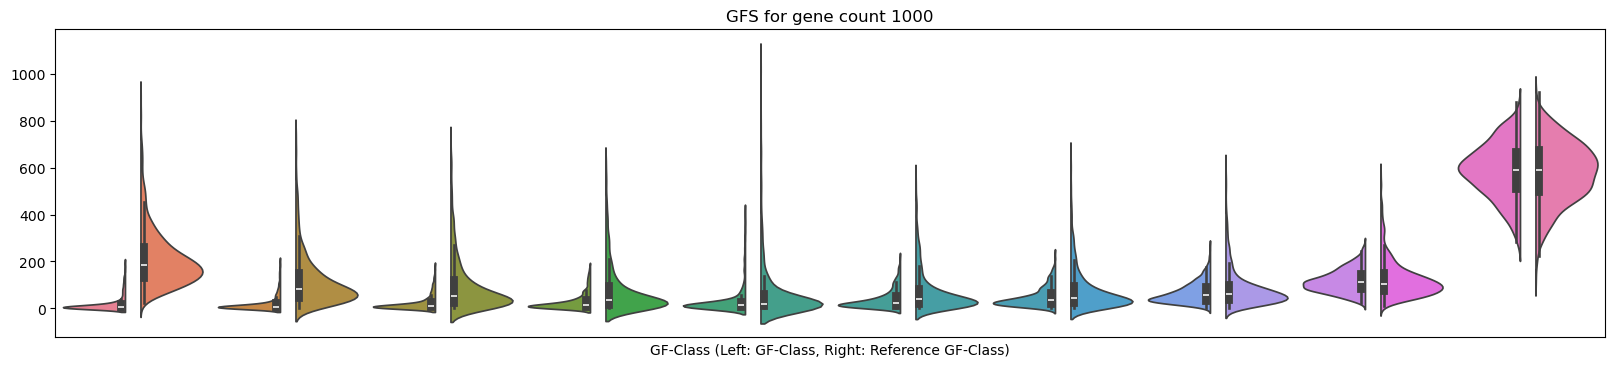

GC: 2000, GF Class 0: KstestResult(statistic=0.601, pvalue=2.396619961945673e-168, statistic_location=110, statistic_sign=-1) <-----------
GC: 2000, GF Class 1: KstestResult(statistic=0.311, pvalue=4.101461018780163e-43, statistic_location=62, statistic_sign=-1) <-----------
GC: 2000, GF Class 2: KstestResult(statistic=0.199, pvalue=9.907298369738481e-18, statistic_location=68, statistic_sign=-1) <-----------
GC: 2000, GF Class 3: KstestResult(statistic=0.124, pvalue=4.0687670654048253e-07, statistic_location=99, statistic_sign=-1) <-----------
GC: 2000, GF Class 4: KstestResult(statistic=0.046, pvalue=0.24068202486600215, statistic_location=76, statistic_sign=-1) 
GC: 2000, GF Class 5: KstestResult(statistic=0.083, pvalue=0.0020287627507189713, statistic_location=102, statistic_sign=-1) <-----------
GC: 2000, GF Class 6: KstestResult(statistic=0.073, pvalue=0.00967775474446886, statistic_location=75, statistic_sign=-1) <-----------
GC: 2000, GF Class 7: KstestResult(statistic=0.042, p

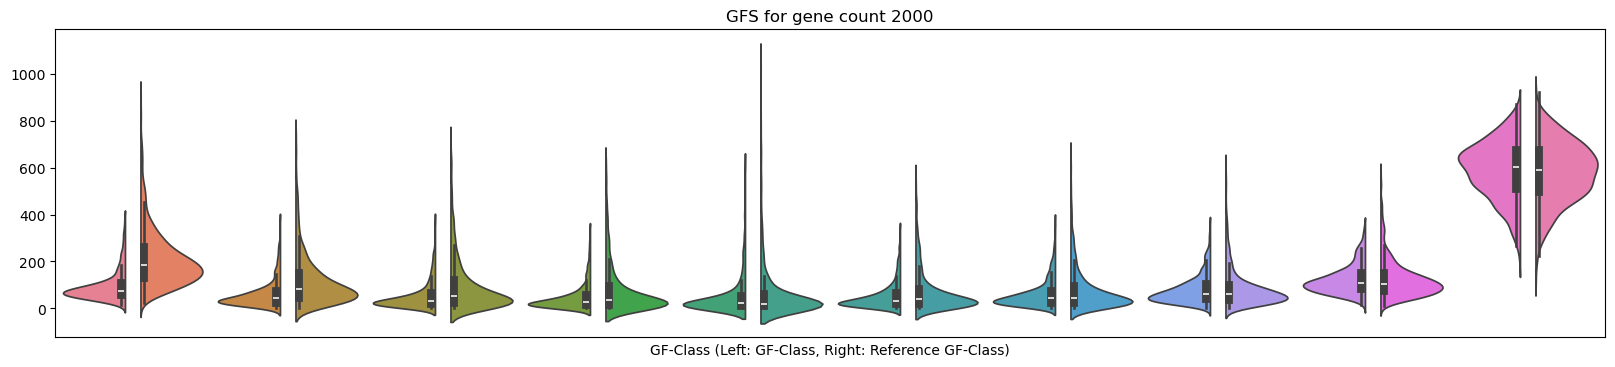

GC: 5000, GF Class 0: KstestResult(statistic=0.234, pvalue=2.0469594201199992e-24, statistic_location=137, statistic_sign=-1) <-----------
GC: 5000, GF Class 1: KstestResult(statistic=0.156, pvalue=4.944209857281109e-11, statistic_location=72, statistic_sign=-1) <-----------
GC: 5000, GF Class 2: KstestResult(statistic=0.108, pvalue=1.690722046468961e-05, statistic_location=81, statistic_sign=-1) <-----------
GC: 5000, GF Class 3: KstestResult(statistic=0.049, pvalue=0.18116454248303263, statistic_location=185, statistic_sign=-1) 
GC: 5000, GF Class 4: KstestResult(statistic=0.029, pvalue=0.7946637387576738, statistic_location=18, statistic_sign=1) 
GC: 5000, GF Class 5: KstestResult(statistic=0.048, pvalue=0.19957365535779528, statistic_location=162, statistic_sign=-1) 
GC: 5000, GF Class 6: KstestResult(statistic=0.076, pvalue=0.006185603570160095, statistic_location=90, statistic_sign=-1) <-----------
GC: 5000, GF Class 7: KstestResult(statistic=0.027, pvalue=0.8595454206943325, sta

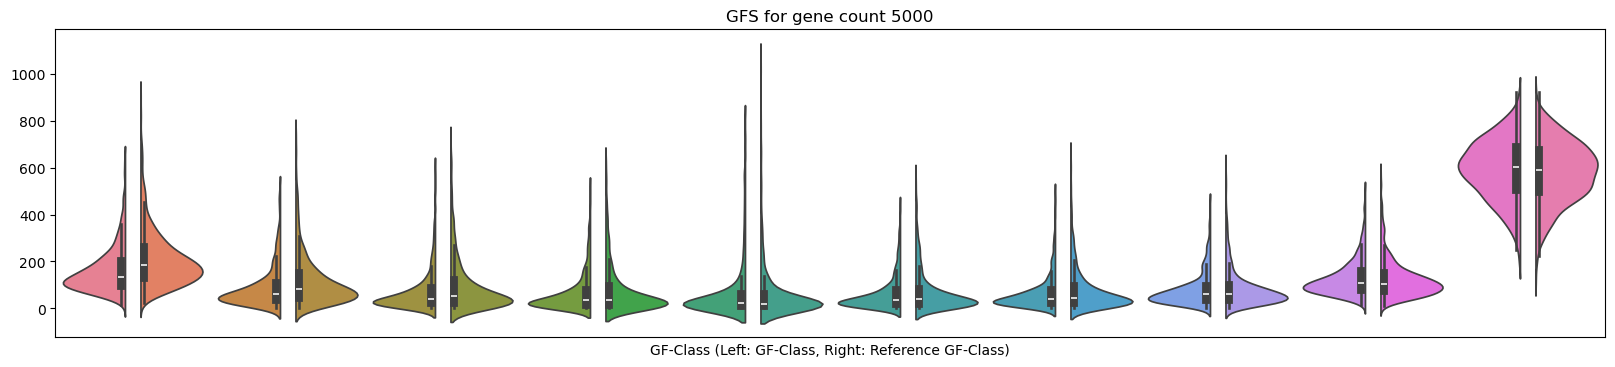

GC: 10000, GF Class 0: KstestResult(statistic=0.109, pvalue=1.3598954602798138e-05, statistic_location=139, statistic_sign=-1) <-----------
GC: 10000, GF Class 1: KstestResult(statistic=0.071, pvalue=0.012912352230759101, statistic_location=65, statistic_sign=-1) <-----------
GC: 10000, GF Class 2: KstestResult(statistic=0.065, pvalue=0.029225323426275904, statistic_location=83, statistic_sign=-1) <-----------
GC: 10000, GF Class 3: KstestResult(statistic=0.053, pvalue=0.12051526066065596, statistic_location=38, statistic_sign=-1) 
GC: 10000, GF Class 4: KstestResult(statistic=0.028, pvalue=0.8282194040312439, statistic_location=112, statistic_sign=-1) 
GC: 10000, GF Class 5: KstestResult(statistic=0.049, pvalue=0.18116454248303263, statistic_location=67, statistic_sign=-1) 
GC: 10000, GF Class 6: KstestResult(statistic=0.046, pvalue=0.24068202486600215, statistic_location=111, statistic_sign=-1) 
GC: 10000, GF Class 7: KstestResult(statistic=0.036, pvalue=0.5362766985932181, statistic

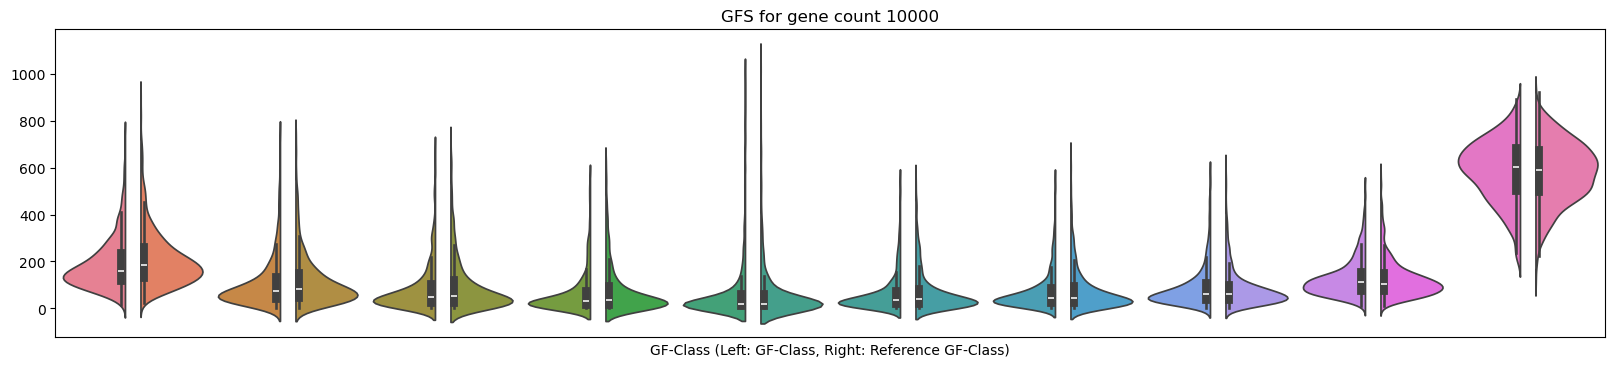

GC: 20000, GF Class 0: KstestResult(statistic=0.042, pvalue=0.34112475112661245, statistic_location=177, statistic_sign=-1) 
GC: 20000, GF Class 1: KstestResult(statistic=0.05, pvalue=0.16411447756429137, statistic_location=62, statistic_sign=-1) 
GC: 20000, GF Class 2: KstestResult(statistic=0.075, pvalue=0.007195361443046065, statistic_location=83, statistic_sign=-1) <-----------
GC: 20000, GF Class 3: KstestResult(statistic=0.035, pvalue=0.5728904395829821, statistic_location=65, statistic_sign=-1) 
GC: 20000, GF Class 4: KstestResult(statistic=0.024, pvalue=0.9357699014782725, statistic_location=54, statistic_sign=1) 
GC: 20000, GF Class 5: KstestResult(statistic=0.04, pvalue=0.4006338815832625, statistic_location=66, statistic_sign=-1) 
GC: 20000, GF Class 6: KstestResult(statistic=0.056, pvalue=0.08689937254547132, statistic_location=61, statistic_sign=-1) 
GC: 20000, GF Class 7: KstestResult(statistic=0.048, pvalue=0.19957365535779528, statistic_location=104, statistic_sign=1) 


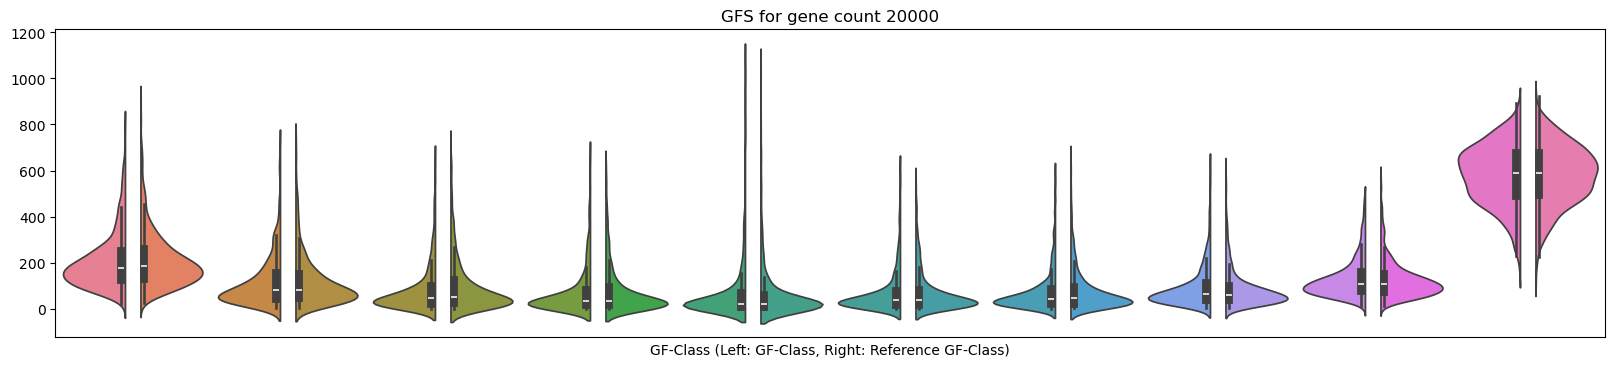

GC: 50000, GF Class 0: KstestResult(statistic=0.044, pvalue=0.28779764348473313, statistic_location=150, statistic_sign=-1) 
GC: 50000, GF Class 1: KstestResult(statistic=0.042, pvalue=0.34112475112661245, statistic_location=36, statistic_sign=-1) 
GC: 50000, GF Class 2: KstestResult(statistic=0.039, pvalue=0.43260886958153144, statistic_location=165, statistic_sign=-1) 
GC: 50000, GF Class 3: KstestResult(statistic=0.041, pvalue=0.37012017606173, statistic_location=99, statistic_sign=-1) 
GC: 50000, GF Class 4: KstestResult(statistic=0.032, pvalue=0.6854967337920594, statistic_location=18, statistic_sign=1) 
GC: 50000, GF Class 5: KstestResult(statistic=0.054, pvalue=0.1082872208757189, statistic_location=65, statistic_sign=-1) 
GC: 50000, GF Class 6: KstestResult(statistic=0.033, pvalue=0.647814872077161, statistic_location=31, statistic_sign=1) 
GC: 50000, GF Class 7: KstestResult(statistic=0.032, pvalue=0.6854967337920594, statistic_location=97, statistic_sign=1) 
GC: 50000, GF Cla

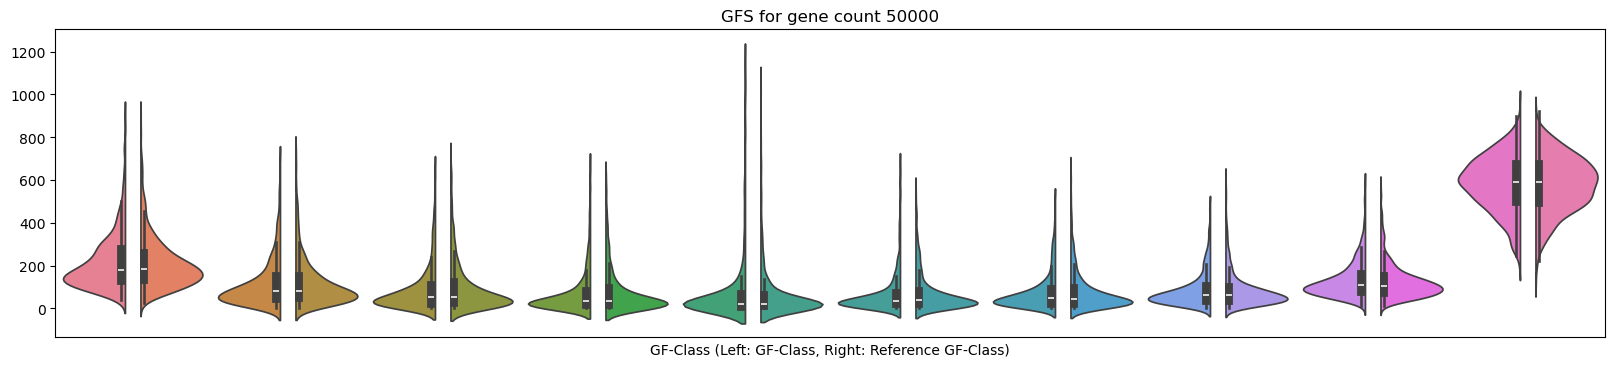

GC: 100000, GF Class 0: KstestResult(statistic=0.029, pvalue=0.7946637387576738, statistic_location=106, statistic_sign=-1) 
GC: 100000, GF Class 1: KstestResult(statistic=0.032, pvalue=0.6854967337920594, statistic_location=38, statistic_sign=-1) 
GC: 100000, GF Class 2: KstestResult(statistic=0.048, pvalue=0.19957365535779528, statistic_location=16, statistic_sign=-1) 
GC: 100000, GF Class 3: KstestResult(statistic=0.029, pvalue=0.7946637387576738, statistic_location=153, statistic_sign=-1) 
GC: 100000, GF Class 4: KstestResult(statistic=0.042, pvalue=0.34112475112661245, statistic_location=34, statistic_sign=1) 
GC: 100000, GF Class 5: KstestResult(statistic=0.043, pvalue=0.3136800387320582, statistic_location=163, statistic_sign=-1) 
GC: 100000, GF Class 6: KstestResult(statistic=0.043, pvalue=0.3136800387320582, statistic_location=67, statistic_sign=-1) 
GC: 100000, GF Class 7: KstestResult(statistic=0.024, pvalue=0.9357699014782725, statistic_location=86, statistic_sign=1) 
GC: 1

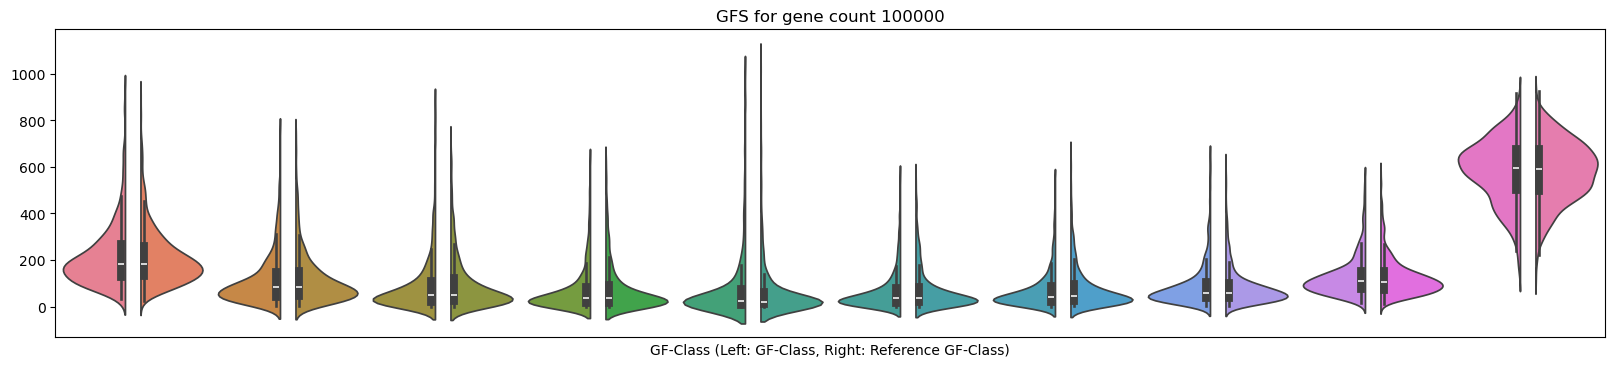

GC: 200000, GF Class 0: KstestResult(statistic=0.028, pvalue=0.8282194040312439, statistic_location=95, statistic_sign=1) 
GC: 200000, GF Class 1: KstestResult(statistic=0.03, pvalue=0.7593695685682871, statistic_location=22, statistic_sign=1) 
GC: 200000, GF Class 2: KstestResult(statistic=0.054, pvalue=0.1082872208757189, statistic_location=109, statistic_sign=-1) 
GC: 200000, GF Class 3: KstestResult(statistic=0.034, pvalue=0.6101664688189142, statistic_location=33, statistic_sign=1) 
GC: 200000, GF Class 4: KstestResult(statistic=0.04, pvalue=0.4006338815832625, statistic_location=34, statistic_sign=1) 
GC: 200000, GF Class 5: KstestResult(statistic=0.021, pvalue=0.9802627322900355, statistic_location=67, statistic_sign=-1) 
GC: 200000, GF Class 6: KstestResult(statistic=0.061, pvalue=0.04839715079181246, statistic_location=87, statistic_sign=-1) <-----------
GC: 200000, GF Class 7: KstestResult(statistic=0.042, pvalue=0.34112475112661245, statistic_location=93, statistic_sign=1) 


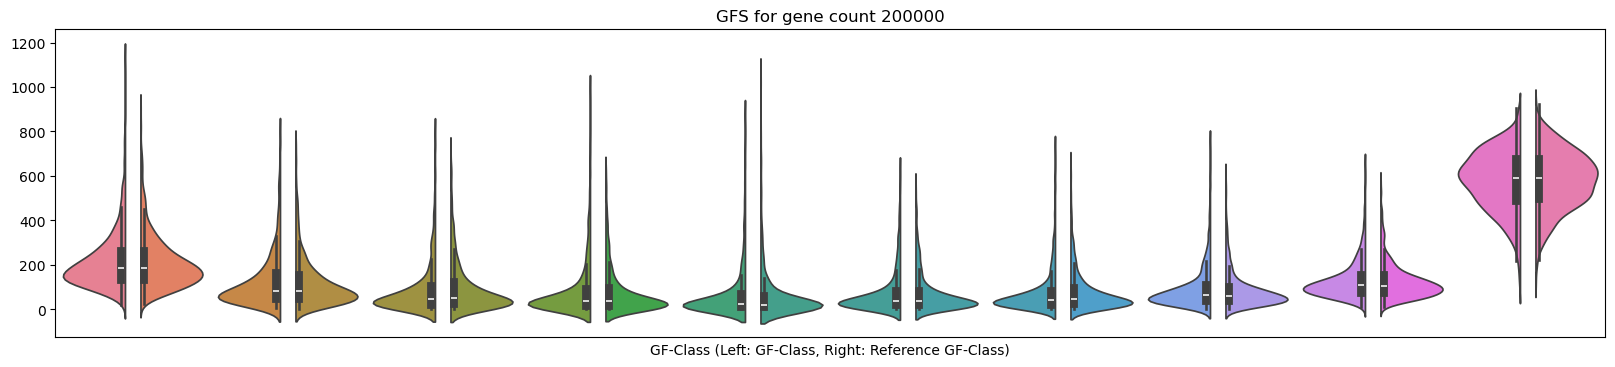

GC: 500000, GF Class 0: KstestResult(statistic=0.038, pvalue=0.4659595288557257, statistic_location=210, statistic_sign=1) 
GC: 500000, GF Class 1: KstestResult(statistic=0.038, pvalue=0.4659595288557257, statistic_location=269, statistic_sign=1) 
GC: 500000, GF Class 2: KstestResult(statistic=0.06, pvalue=0.05462666510701526, statistic_location=83, statistic_sign=-1) 
GC: 500000, GF Class 3: KstestResult(statistic=0.036, pvalue=0.5362766985932181, statistic_location=6, statistic_sign=-1) 
GC: 500000, GF Class 4: KstestResult(statistic=0.043, pvalue=0.3136800387320582, statistic_location=8, statistic_sign=-1) 
GC: 500000, GF Class 5: KstestResult(statistic=0.039, pvalue=0.43260886958153144, statistic_location=148, statistic_sign=-1) 
GC: 500000, GF Class 6: KstestResult(statistic=0.045, pvalue=0.26347172719864703, statistic_location=128, statistic_sign=-1) 
GC: 500000, GF Class 7: KstestResult(statistic=0.047, pvalue=0.21939649929677082, statistic_location=131, statistic_sign=1) 
GC: 5

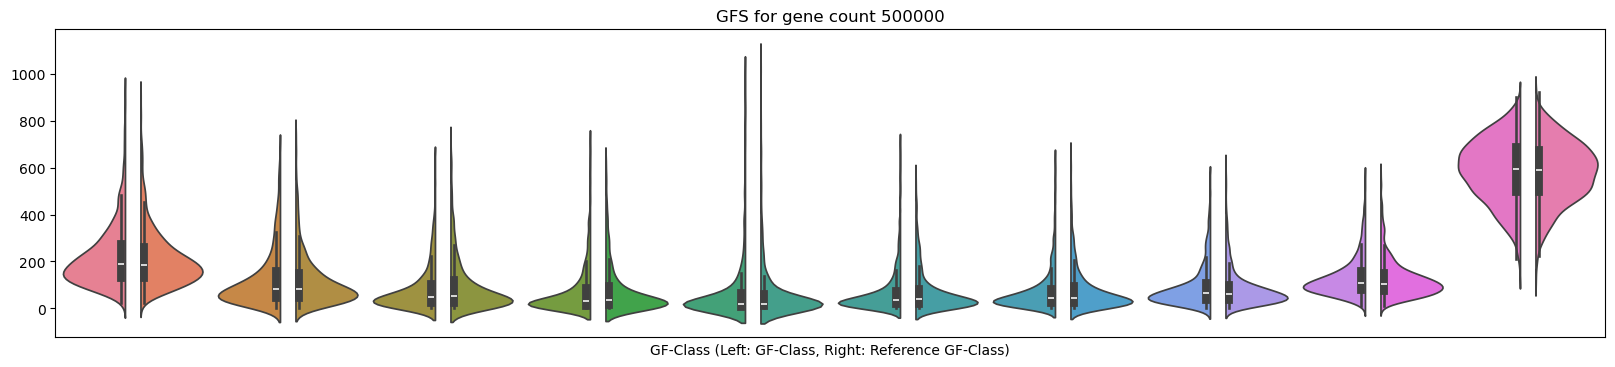

In [10]:
# KS Test and Violin plot
for gc, current_gfs in gfs_dict.items():
    for i in range(num_samples):
        res = stats.ks_2samp(reference_gfs[i], current_gfs[i])
        significant = "<-----------" if res.pvalue < 0.05 else ""
        print(f"GC: {gc}, GF Class {i}: {res} {significant}")
    plt.figure(figsize=(20, 4))
    joined = [x for y in zip(current_gfs, reference_gfs) for x in y]
    sns.violinplot(data=joined, split=True)
    plt.title(f"GFS for Number of Sites {gc}")
    plt.xlabel("GF-Class (Left: GF-Class, Right: Reference GF-Class)")
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    plt.savefig(f"{base_dir}gc_class_{gc}.png")
    plt.savefig(f"{base_dir}gc_class_{gc}.pdf")
    plt.show()


GC: 1000: TtestResult(statistic=4.25246646919828, pvalue=2.2118067611038442e-05, df=1998.0) <-----------


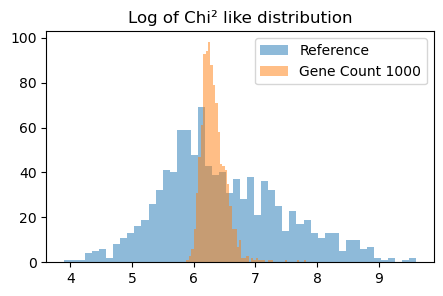

GC: 2000: TtestResult(statistic=9.462148719478161, pvalue=8.16626331108529e-21, df=1998.0) <-----------


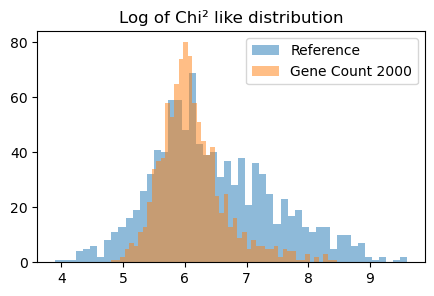

GC: 5000: TtestResult(statistic=5.937259934957552, pvalue=3.4090374575906354e-09, df=1998.0) <-----------


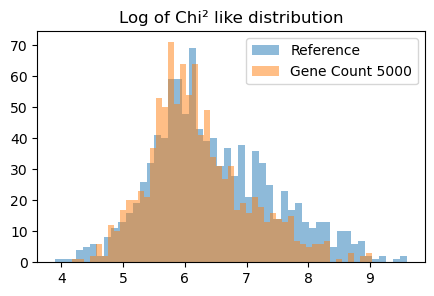

GC: 10000: TtestResult(statistic=3.9353901159408706, pvalue=8.590314054102468e-05, df=1998.0) <-----------


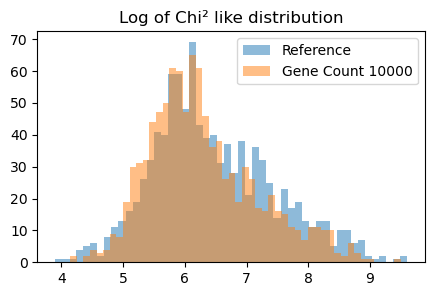

GC: 20000: TtestResult(statistic=1.4849905911984536, pvalue=0.13770406515616687, df=1998.0) 


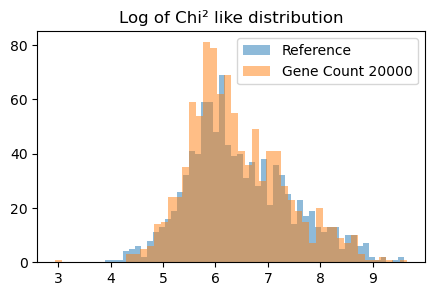

GC: 50000: TtestResult(statistic=1.0115499820180358, pvalue=0.3118757531113007, df=1998.0) 


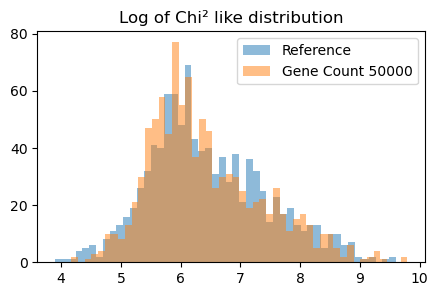

GC: 100000: TtestResult(statistic=0.27555338134230906, pvalue=0.7829196143275485, df=1998.0) 


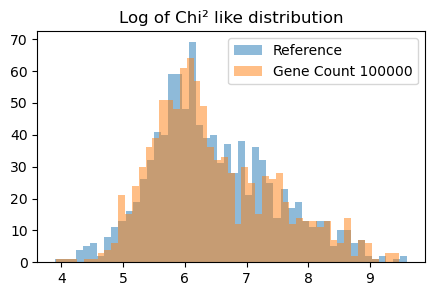

GC: 200000: TtestResult(statistic=-0.24758302608939678, pvalue=0.8044824843386189, df=1998.0) 


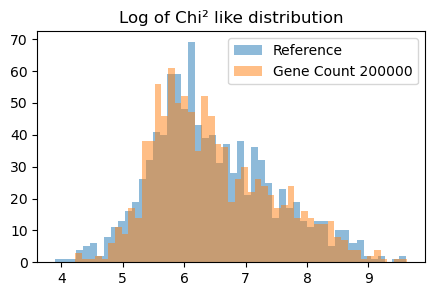

GC: 500000: TtestResult(statistic=1.575868440921557, pvalue=0.11521443788306826, df=1998.0) 


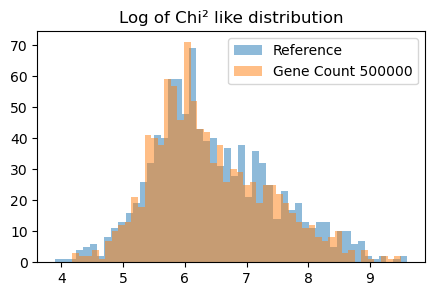

In [11]:
# t test of chi² like dist

reference_gfs = np.transpose(reference_gfs)

expected_gfs = np.array(
        [
            gfs.expected_gf(n=num_samples, k=i + 1, theta=theta, rho=rho)
            for i in range(num_samples)
        ]
    )

reference_chi_squared = [neutrality_test.chi_squared_like_statistic(gf, expected_gfs) for gf in reference_gfs]
reference_chi_squared = np.log(reference_chi_squared)

for gc, current_gfs in gfs_dict.items():
    current_gfs = np.transpose(current_gfs)
    chi_squared_values = [neutrality_test.chi_squared_like_statistic(gf, expected_gfs) for gf in current_gfs]
    chi_squared_values = np.log(chi_squared_values)
    res = stats.ttest_ind(reference_chi_squared, chi_squared_values)
    significant = "<-----------" if res.pvalue < 0.05 else ""
    print(f"GC: {gc}: {res} {significant}")

    plt.figure(figsize=(5,3))
    plt.hist(reference_chi_squared, bins=50, alpha=0.5, label="Reference")
    plt.hist(chi_squared_values, bins=50, alpha=0.5, label=f"Number of Sites {gc}")
    plt.title("Log of Chi² like distribution")
    plt.legend()
    plt.savefig(f"{base_dir}chi2_class_{gc}.png")
    plt.savefig(f"{base_dir}chi2_class_{gc}.pdf")
    plt.show()

In [3]:
file_path = f"{base_dir}ratio.csv"
df = pd.read_csv(file_path)

#df = df[df["rho"] == 0.1]

df["ratio"] = df["theta"] / df["rho"]
df["ratio"] = df["ratio"].round(3)

df["mean"] = df.iloc[:, 4:].mean(axis=1)
df["percent"] = df["mean"] / df["ratio"]

mean_df = df.groupby(['num_sites', 'ratio'])['mean'].mean().reset_index()
mean_df = mean_df.pivot(index="ratio", columns="num_sites", values="mean")
mean_df.index = mean_df.index.round(2)

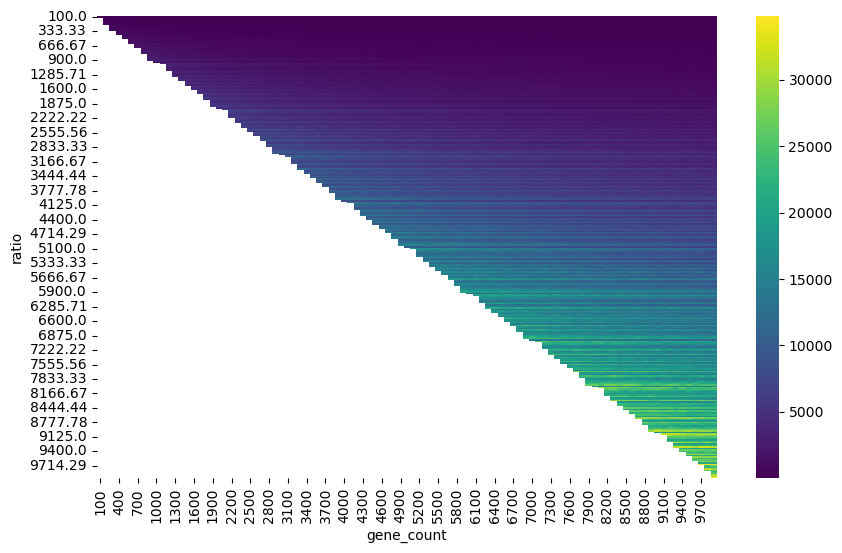

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(mean_df, robust=False, cmap="viridis")
plt.savefig(f"{base_dir}ratio.png")
plt.savefig(f"{base_dir}ratio.pdf")

In [31]:
file_path = f"{base_dir}ratio_percent.csv"
df = pd.read_csv(file_path)
#df = df[df["rho"] == 0.1]

df["ratio"] = df["theta"] / df["rho"]
df["ratio"] = df["ratio"].round(3)

double_events_columns = [c for c in df.columns[3:] if c.startswith("d")]
total_events_columns = [c for c in df.columns[3:] if c.startswith("t")]

df["mean_double"] = df[double_events_columns].mean(axis=1)
df["mean_total"] = df[total_events_columns].mean(axis=1)

df["sum_double"] = df[double_events_columns].sum(axis=1)
df["sum_total"] = df[total_events_columns].sum(axis=1)

df["percent"] = df["sum_double"] / df["sum_total"]

percent_df = df.groupby(["num_sites", "ratio"])[["sum_double", "sum_total"]].sum().reset_index()

#df[df["num_sites"] == 2000][df["ratio"] == 2000]["sum_total"])
percent_df["percent"] = df["sum_double"] / df["sum_total"]

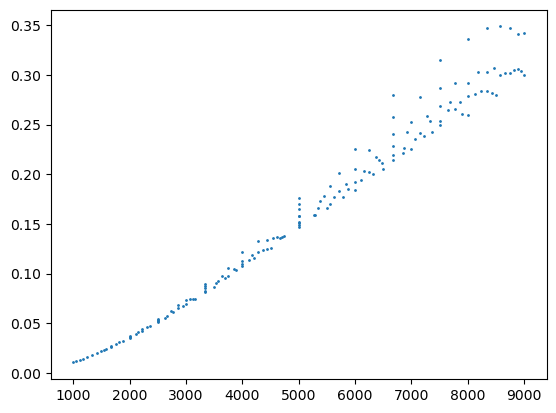

In [18]:
plt.scatter(df[df["num_sites"] == 9000]["ratio"], df[df["num_sites"] == 9000]["percent"], s=1)

In [6]:
percent_df = percent_df.pivot(index="ratio", columns="num_sites", values="percent")
percent_df.index = percent_df.index.round(2)

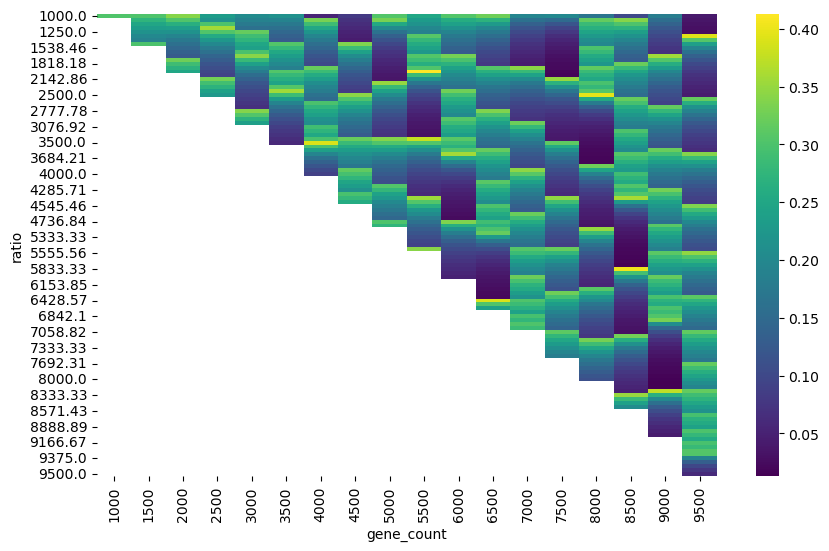

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(percent_df, robust=False, square=False, cmap="viridis")
plt.savefig(f"{base_dir}percent.png")
plt.savefig(f"{base_dir}percent.pdf")